## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import baselineModels
import scrapbook as sb 
import torch 
import statsModel
import bostonDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Import Dataset 
### Boston Dataset 

In [3]:
X,Y = bostonDataset.boston_data()
n_features = 13 
n_samples = 506 
n_target = 1 

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.739
Model:                            OLS   Adj. R-squared (uncentered):              0.731
Method:                 Least Squares   F-statistic:                              85.33
Date:                Sat, 27 Nov 2021   Prob (F-statistic):                   1.95e-105
Time:                        10:42:52   Log-Likelihood:                         -299.40
No. Observations:                 404   AIC:                                      624.8
Df Residuals:                     391   BIC:                                      676.8
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

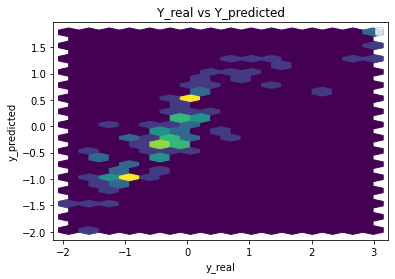

Performance Metrics
Mean Squared Error: 0.2807182700913277
Mean Absolute Error: 0.3775478448950314
Manhattan distance: 38.509880179293205
Euclidean distance: 5.351005844634766


In [5]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

#Store Coefficients 
sb.glue("Coefficients",coeff)

## Random Forest 

In [6]:
mse_rf = baselineModels.randomForest(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Random Forest MSE",mse_rf)

Mean Squared error 0.17836605505943684


## Catboost 



In [7]:
mse_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Catboost MSE",mse_cb)

Learning rate set to 0.033215


0:	learn: 1.0176966	total: 58.6ms	remaining: 58.5s
1:	learn: 0.9977665	total: 59.8ms	remaining: 29.8s
2:	learn: 0.9774440	total: 61ms	remaining: 20.3s
3:	learn: 0.9594828	total: 62ms	remaining: 15.4s
4:	learn: 0.9419478	total: 63ms	remaining: 12.5s
5:	learn: 0.9241068	total: 63.9ms	remaining: 10.6s
6:	learn: 0.9061856	total: 64.9ms	remaining: 9.2s
7:	learn: 0.8894614	total: 65.8ms	remaining: 8.16s
8:	learn: 0.8735646	total: 66.7ms	remaining: 7.35s
9:	learn: 0.8571524	total: 67.7ms	remaining: 6.7s
10:	learn: 0.8418329	total: 68.6ms	remaining: 6.17s
11:	learn: 0.8273598	total: 69.5ms	remaining: 5.72s
12:	learn: 0.8110796	total: 70.4ms	remaining: 5.34s
13:	learn: 0.7947873	total: 71.3ms	remaining: 5.02s
14:	learn: 0.7820932	total: 72.4ms	remaining: 4.75s
15:	learn: 0.7665944	total: 73.3ms	remaining: 4.5s
16:	learn: 0.7525031	total: 74.1ms	remaining: 4.29s
17:	learn: 0.7391844	total: 75ms	remaining: 4.09s
18:	learn: 0.7260428	total: 76.6ms	remaining: 3.95s
19:	learn: 0.7128911	total: 77.4m

114:	learn: 0.2932268	total: 159ms	remaining: 1.22s
115:	learn: 0.2920254	total: 160ms	remaining: 1.22s
116:	learn: 0.2908044	total: 161ms	remaining: 1.21s
117:	learn: 0.2895210	total: 162ms	remaining: 1.21s
118:	learn: 0.2883468	total: 162ms	remaining: 1.2s
119:	learn: 0.2877114	total: 163ms	remaining: 1.2s
120:	learn: 0.2865722	total: 164ms	remaining: 1.19s
121:	learn: 0.2857185	total: 165ms	remaining: 1.19s
122:	learn: 0.2849058	total: 166ms	remaining: 1.18s
123:	learn: 0.2832195	total: 167ms	remaining: 1.18s
124:	learn: 0.2818522	total: 168ms	remaining: 1.17s
125:	learn: 0.2803418	total: 169ms	remaining: 1.17s
126:	learn: 0.2786982	total: 169ms	remaining: 1.16s
127:	learn: 0.2775879	total: 170ms	remaining: 1.16s
128:	learn: 0.2764760	total: 171ms	remaining: 1.16s
129:	learn: 0.2754518	total: 172ms	remaining: 1.15s
130:	learn: 0.2746419	total: 173ms	remaining: 1.15s
131:	learn: 0.2734018	total: 174ms	remaining: 1.14s
132:	learn: 0.2728881	total: 174ms	remaining: 1.14s
133:	learn: 0.

153:	learn: 0.2547531	total: 192ms	remaining: 1.06s
154:	learn: 0.2541615	total: 193ms	remaining: 1.05s
155:	learn: 0.2536714	total: 194ms	remaining: 1.05s
156:	learn: 0.2527374	total: 195ms	remaining: 1.05s
157:	learn: 0.2519606	total: 196ms	remaining: 1.04s
158:	learn: 0.2512947	total: 197ms	remaining: 1.04s
159:	learn: 0.2506204	total: 198ms	remaining: 1.04s
160:	learn: 0.2501325	total: 199ms	remaining: 1.04s
161:	learn: 0.2494766	total: 200ms	remaining: 1.03s
162:	learn: 0.2489878	total: 201ms	remaining: 1.03s
163:	learn: 0.2483886	total: 201ms	remaining: 1.03s
164:	learn: 0.2477773	total: 202ms	remaining: 1.02s
165:	learn: 0.2471726	total: 203ms	remaining: 1.02s
166:	learn: 0.2461498	total: 204ms	remaining: 1.02s
167:	learn: 0.2455087	total: 205ms	remaining: 1.01s
168:	learn: 0.2446460	total: 206ms	remaining: 1.01s
169:	learn: 0.2439031	total: 207ms	remaining: 1.01s
170:	learn: 0.2429499	total: 207ms	remaining: 1s
171:	learn: 0.2421994	total: 208ms	remaining: 1s
172:	learn: 0.2416

217:	learn: 0.2136536	total: 248ms	remaining: 891ms
218:	learn: 0.2131291	total: 249ms	remaining: 889ms
219:	learn: 0.2125923	total: 250ms	remaining: 887ms
220:	learn: 0.2121060	total: 251ms	remaining: 884ms
221:	learn: 0.2114597	total: 252ms	remaining: 882ms
222:	learn: 0.2111063	total: 252ms	remaining: 880ms
223:	learn: 0.2105122	total: 253ms	remaining: 878ms
224:	learn: 0.2100565	total: 254ms	remaining: 875ms
225:	learn: 0.2093962	total: 255ms	remaining: 874ms
226:	learn: 0.2087552	total: 256ms	remaining: 872ms
227:	learn: 0.2081354	total: 257ms	remaining: 870ms
228:	learn: 0.2078519	total: 258ms	remaining: 868ms
229:	learn: 0.2075219	total: 259ms	remaining: 866ms
230:	learn: 0.2070762	total: 259ms	remaining: 864ms
231:	learn: 0.2068099	total: 260ms	remaining: 861ms
232:	learn: 0.2063327	total: 261ms	remaining: 860ms
233:	learn: 0.2059302	total: 262ms	remaining: 857ms
234:	learn: 0.2053510	total: 263ms	remaining: 856ms
235:	learn: 0.2049924	total: 264ms	remaining: 854ms
236:	learn: 

332:	learn: 0.1678079	total: 349ms	remaining: 698ms
333:	learn: 0.1673480	total: 350ms	remaining: 697ms
334:	learn: 0.1671586	total: 351ms	remaining: 696ms
335:	learn: 0.1668770	total: 351ms	remaining: 694ms
336:	learn: 0.1664297	total: 352ms	remaining: 693ms
337:	learn: 0.1661588	total: 353ms	remaining: 691ms
338:	learn: 0.1658863	total: 354ms	remaining: 690ms
339:	learn: 0.1656532	total: 355ms	remaining: 689ms
340:	learn: 0.1651964	total: 356ms	remaining: 687ms
341:	learn: 0.1647584	total: 357ms	remaining: 686ms
342:	learn: 0.1644342	total: 357ms	remaining: 685ms
343:	learn: 0.1640339	total: 358ms	remaining: 683ms
344:	learn: 0.1637429	total: 359ms	remaining: 682ms
345:	learn: 0.1633007	total: 360ms	remaining: 680ms
346:	learn: 0.1631172	total: 361ms	remaining: 679ms
347:	learn: 0.1628873	total: 362ms	remaining: 677ms
348:	learn: 0.1627466	total: 362ms	remaining: 676ms
349:	learn: 0.1625238	total: 363ms	remaining: 675ms
350:	learn: 0.1619362	total: 364ms	remaining: 674ms
351:	learn: 

371:	learn: 0.1562695	total: 382ms	remaining: 645ms
372:	learn: 0.1560738	total: 383ms	remaining: 644ms
373:	learn: 0.1556855	total: 384ms	remaining: 643ms
374:	learn: 0.1554971	total: 385ms	remaining: 642ms
375:	learn: 0.1551441	total: 386ms	remaining: 640ms
376:	learn: 0.1547467	total: 387ms	remaining: 639ms
377:	learn: 0.1546181	total: 388ms	remaining: 638ms
378:	learn: 0.1542936	total: 389ms	remaining: 637ms
379:	learn: 0.1540265	total: 389ms	remaining: 635ms
380:	learn: 0.1538460	total: 390ms	remaining: 634ms
381:	learn: 0.1534666	total: 391ms	remaining: 633ms
382:	learn: 0.1532888	total: 392ms	remaining: 631ms
383:	learn: 0.1528825	total: 393ms	remaining: 630ms
384:	learn: 0.1524462	total: 394ms	remaining: 629ms
385:	learn: 0.1522543	total: 394ms	remaining: 627ms
386:	learn: 0.1519197	total: 395ms	remaining: 626ms
387:	learn: 0.1515677	total: 396ms	remaining: 625ms
388:	learn: 0.1511306	total: 397ms	remaining: 624ms
389:	learn: 0.1508909	total: 398ms	remaining: 622ms
390:	learn: 

437:	learn: 0.1384456	total: 439ms	remaining: 563ms
438:	learn: 0.1380458	total: 440ms	remaining: 562ms
439:	learn: 0.1378868	total: 441ms	remaining: 561ms
440:	learn: 0.1376853	total: 442ms	remaining: 560ms
441:	learn: 0.1374130	total: 443ms	remaining: 559ms
442:	learn: 0.1372212	total: 443ms	remaining: 557ms
443:	learn: 0.1370798	total: 444ms	remaining: 556ms
444:	learn: 0.1368714	total: 445ms	remaining: 555ms
445:	learn: 0.1365476	total: 446ms	remaining: 554ms
446:	learn: 0.1362534	total: 447ms	remaining: 552ms
447:	learn: 0.1360725	total: 448ms	remaining: 551ms
448:	learn: 0.1357262	total: 448ms	remaining: 550ms
449:	learn: 0.1354865	total: 449ms	remaining: 549ms
450:	learn: 0.1352705	total: 450ms	remaining: 548ms
451:	learn: 0.1349118	total: 451ms	remaining: 547ms
452:	learn: 0.1347051	total: 452ms	remaining: 546ms
453:	learn: 0.1343200	total: 453ms	remaining: 545ms
454:	learn: 0.1342252	total: 454ms	remaining: 543ms
455:	learn: 0.1340157	total: 455ms	remaining: 542ms
456:	learn: 

536:	learn: 0.1168027	total: 524ms	remaining: 452ms
537:	learn: 0.1164684	total: 525ms	remaining: 451ms
538:	learn: 0.1161965	total: 526ms	remaining: 450ms
539:	learn: 0.1160113	total: 527ms	remaining: 449ms
540:	learn: 0.1158803	total: 528ms	remaining: 448ms
541:	learn: 0.1157675	total: 528ms	remaining: 447ms
542:	learn: 0.1155932	total: 529ms	remaining: 445ms
543:	learn: 0.1154237	total: 532ms	remaining: 446ms
544:	learn: 0.1152328	total: 533ms	remaining: 445ms
545:	learn: 0.1151167	total: 534ms	remaining: 444ms
546:	learn: 0.1150085	total: 535ms	remaining: 443ms
547:	learn: 0.1149028	total: 536ms	remaining: 442ms
548:	learn: 0.1148038	total: 536ms	remaining: 441ms
549:	learn: 0.1146052	total: 537ms	remaining: 440ms
550:	learn: 0.1144812	total: 538ms	remaining: 438ms
551:	learn: 0.1143215	total: 539ms	remaining: 437ms
552:	learn: 0.1142036	total: 540ms	remaining: 436ms
553:	learn: 0.1141305	total: 541ms	remaining: 435ms
554:	learn: 0.1140756	total: 541ms	remaining: 434ms
555:	learn: 

574:	learn: 0.1107001	total: 558ms	remaining: 412ms
575:	learn: 0.1104373	total: 559ms	remaining: 411ms
576:	learn: 0.1102897	total: 560ms	remaining: 410ms
577:	learn: 0.1101735	total: 561ms	remaining: 409ms
578:	learn: 0.1099987	total: 562ms	remaining: 408ms
579:	learn: 0.1098924	total: 563ms	remaining: 407ms
580:	learn: 0.1097277	total: 564ms	remaining: 406ms
581:	learn: 0.1095524	total: 564ms	remaining: 405ms
582:	learn: 0.1094854	total: 565ms	remaining: 404ms
583:	learn: 0.1093722	total: 566ms	remaining: 403ms
584:	learn: 0.1092608	total: 567ms	remaining: 402ms
585:	learn: 0.1090546	total: 568ms	remaining: 401ms
586:	learn: 0.1089088	total: 569ms	remaining: 400ms
587:	learn: 0.1087885	total: 570ms	remaining: 399ms
588:	learn: 0.1085290	total: 571ms	remaining: 398ms
589:	learn: 0.1083913	total: 571ms	remaining: 397ms
590:	learn: 0.1082352	total: 572ms	remaining: 396ms
591:	learn: 0.1081241	total: 574ms	remaining: 395ms
592:	learn: 0.1079782	total: 575ms	remaining: 394ms
593:	learn: 

638:	learn: 0.1022710	total: 614ms	remaining: 347ms
639:	learn: 0.1020386	total: 615ms	remaining: 346ms
640:	learn: 0.1019368	total: 616ms	remaining: 345ms
641:	learn: 0.1018318	total: 617ms	remaining: 344ms
642:	learn: 0.1017032	total: 617ms	remaining: 343ms
643:	learn: 0.1015887	total: 618ms	remaining: 342ms
644:	learn: 0.1015205	total: 619ms	remaining: 341ms
645:	learn: 0.1014982	total: 620ms	remaining: 340ms
646:	learn: 0.1014783	total: 621ms	remaining: 339ms
647:	learn: 0.1013910	total: 622ms	remaining: 338ms
648:	learn: 0.1012975	total: 623ms	remaining: 337ms
649:	learn: 0.1010551	total: 624ms	remaining: 336ms
650:	learn: 0.1009053	total: 624ms	remaining: 335ms
651:	learn: 0.1006934	total: 625ms	remaining: 334ms
652:	learn: 0.1006757	total: 626ms	remaining: 333ms
653:	learn: 0.1006080	total: 627ms	remaining: 332ms
654:	learn: 0.1004643	total: 628ms	remaining: 331ms
655:	learn: 0.1002321	total: 629ms	remaining: 330ms
656:	learn: 0.0999574	total: 630ms	remaining: 329ms
657:	learn: 

754:	learn: 0.0872071	total: 715ms	remaining: 232ms
755:	learn: 0.0871328	total: 716ms	remaining: 231ms
756:	learn: 0.0870535	total: 717ms	remaining: 230ms
757:	learn: 0.0869463	total: 718ms	remaining: 229ms
758:	learn: 0.0868686	total: 719ms	remaining: 228ms
759:	learn: 0.0867865	total: 720ms	remaining: 227ms
760:	learn: 0.0866606	total: 721ms	remaining: 226ms
761:	learn: 0.0866130	total: 722ms	remaining: 225ms
762:	learn: 0.0865164	total: 722ms	remaining: 224ms
763:	learn: 0.0862865	total: 723ms	remaining: 223ms
764:	learn: 0.0860549	total: 724ms	remaining: 222ms
765:	learn: 0.0859776	total: 725ms	remaining: 221ms
766:	learn: 0.0859251	total: 726ms	remaining: 220ms
767:	learn: 0.0857999	total: 727ms	remaining: 219ms
768:	learn: 0.0856694	total: 727ms	remaining: 219ms
769:	learn: 0.0855838	total: 728ms	remaining: 218ms
770:	learn: 0.0854316	total: 729ms	remaining: 217ms
771:	learn: 0.0853388	total: 730ms	remaining: 216ms
772:	learn: 0.0851940	total: 731ms	remaining: 215ms
773:	learn: 

792:	learn: 0.0827713	total: 748ms	remaining: 195ms
793:	learn: 0.0827060	total: 749ms	remaining: 194ms
794:	learn: 0.0826156	total: 750ms	remaining: 193ms
795:	learn: 0.0824521	total: 751ms	remaining: 193ms
796:	learn: 0.0823469	total: 752ms	remaining: 192ms
797:	learn: 0.0822929	total: 753ms	remaining: 191ms
798:	learn: 0.0821813	total: 754ms	remaining: 190ms
799:	learn: 0.0820640	total: 754ms	remaining: 189ms
800:	learn: 0.0819774	total: 755ms	remaining: 188ms
801:	learn: 0.0818130	total: 756ms	remaining: 187ms
802:	learn: 0.0816566	total: 757ms	remaining: 186ms
803:	learn: 0.0815761	total: 758ms	remaining: 185ms
804:	learn: 0.0814506	total: 759ms	remaining: 184ms
805:	learn: 0.0813946	total: 759ms	remaining: 183ms
806:	learn: 0.0813259	total: 760ms	remaining: 182ms
807:	learn: 0.0812624	total: 761ms	remaining: 181ms
808:	learn: 0.0811682	total: 762ms	remaining: 180ms
809:	learn: 0.0810633	total: 763ms	remaining: 179ms
810:	learn: 0.0808850	total: 764ms	remaining: 178ms
811:	learn: 

859:	learn: 0.0756432	total: 805ms	remaining: 131ms
860:	learn: 0.0754732	total: 806ms	remaining: 130ms
861:	learn: 0.0753563	total: 807ms	remaining: 129ms
862:	learn: 0.0752206	total: 808ms	remaining: 128ms
863:	learn: 0.0751727	total: 809ms	remaining: 127ms
864:	learn: 0.0749915	total: 809ms	remaining: 126ms
865:	learn: 0.0749274	total: 810ms	remaining: 125ms
866:	learn: 0.0747763	total: 811ms	remaining: 124ms
867:	learn: 0.0746901	total: 812ms	remaining: 124ms
868:	learn: 0.0746401	total: 813ms	remaining: 123ms
869:	learn: 0.0744647	total: 814ms	remaining: 122ms
870:	learn: 0.0742954	total: 815ms	remaining: 121ms
871:	learn: 0.0742412	total: 816ms	remaining: 120ms
872:	learn: 0.0740906	total: 816ms	remaining: 119ms
873:	learn: 0.0739671	total: 817ms	remaining: 118ms
874:	learn: 0.0738335	total: 818ms	remaining: 117ms
875:	learn: 0.0737362	total: 819ms	remaining: 116ms
876:	learn: 0.0736909	total: 820ms	remaining: 115ms
877:	learn: 0.0735773	total: 821ms	remaining: 114ms
878:	learn: 

977:	learn: 0.0643472	total: 906ms	remaining: 20.4ms
978:	learn: 0.0642169	total: 907ms	remaining: 19.5ms
979:	learn: 0.0641701	total: 908ms	remaining: 18.5ms
980:	learn: 0.0640962	total: 909ms	remaining: 17.6ms
981:	learn: 0.0639589	total: 910ms	remaining: 16.7ms
982:	learn: 0.0638788	total: 911ms	remaining: 15.8ms
983:	learn: 0.0638351	total: 911ms	remaining: 14.8ms
984:	learn: 0.0637404	total: 912ms	remaining: 13.9ms
985:	learn: 0.0635702	total: 913ms	remaining: 13ms
986:	learn: 0.0635455	total: 914ms	remaining: 12ms
987:	learn: 0.0634804	total: 915ms	remaining: 11.1ms
988:	learn: 0.0634213	total: 915ms	remaining: 10.2ms
989:	learn: 0.0633715	total: 916ms	remaining: 9.26ms
990:	learn: 0.0632884	total: 917ms	remaining: 8.33ms
991:	learn: 0.0631558	total: 918ms	remaining: 7.4ms
992:	learn: 0.0630775	total: 919ms	remaining: 6.48ms
993:	learn: 0.0630148	total: 920ms	remaining: 5.55ms
994:	learn: 0.0629224	total: 921ms	remaining: 4.63ms
995:	learn: 0.0628724	total: 922ms	remaining: 3.7ms

## Vanilla Neural Network 

In [8]:
# Parameters 
n_epochs = 5000
batch_size = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
baselineModels.vanillaNeuralNetwork(train_data,test_data,batch_size,n_features,n_target,n_epochs)

Mean Squared error 0.9781982070929961
